This project have two parts. In Part 1, **YOLO v3, Darknet** is trained with 8 classes of different types of vehicles, using Colab GPU. In Part 2, the model is varified and demonstrated. Part 2 is either done with colab (in this notebook) or using pc without GPU with another notebook. 

References:

1. [AlexeyAB's Darknet repo](https://github.com/AlexeyAB/darknet/).
2. [How to train YOLOv3 using Darknet framework and optimize the VM runtime load times](http://blog.ibanyez.info/blogs/coding/20190410-run-a-google-colab-notebook-to-train-yolov3-using-darknet-in/) 
3. [Yolov3_Gun_Detection](https://github.com/quangnhat185/Machine_learning_projects/blob/master/Gun_detection_Yolov3/Yolov3_Gun_Detection.ipynb)
4. [BBox-Label-Tool](https://github.com/puzzledqs/BBox-Label-Tool)
5. [YOLO original web site](https://pjreddie.com/darknet/yolo/)
6. [YOLO Introduction](https://www.youtube.com/watch?v=9s_FpMpdYW8)



# Part 1 - Training YOLO on Colab

## Google Drive setup

1. Connect to Google Drive:
Install and configure Google Backup and Sync to keep one folder synced with a folder on local computer.
2. Create a folder on Google Drive named _**darknet**_
3. Move all your root folder files into a folder

## Connect the Colab notebook to Google Drive



In [ ]:
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# List the content of your local computer folder 
#!ls -la "/content/gdrive/My Drive/darknet"

In [ ]:
#skip
#!sudo apt-get install tree

In [ ]:
#skip
#!tree /content/gdrive/My\ Drive/darknet/

In [ ]:
# to simplify paths, can use a Symbolic link.
# Uncomment if you want to use Symbolic link
#!ln -s /content/gdrive/My\ Drive/darknet/ /mydrive
#!ls /mydrive

## Colab Setup

1. Configure runtime to work with GPU: 
Go to **> Menu > Runtime > Configure Runtime Type** And select **GPU** From the **Hardware accelerator** drop down meu
2. Check CUDA release version: 
Nvidia CUDA is pre-installed on Colab notebooks. Check the version installed.
3. Install cuDNN according to the current CUDA version.
* Download cuDNN from [Nvidia website](https://developer.nvidia.com/cudnn) 
* On local computer, create a folder named _**cuDNN**_ in your local folder _**darknet**_. Copy the _**tgz**_ file there
4. Unzipping the cuDNN files

In [ ]:
# Checked the current CUDA version
#!/usr/local/cuda/bin/nvcc --version


In [ ]:
!nvidia-smi

In [ ]:
# unzipping the cuDNN files from local Drive folder directly to the VM CUDA folders
#skip
#!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
#!chmod a+r /usr/local/cuda/include/cudnn.h

# Check the version we installed. Can comment this line on future runs
#skip
#!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

## Installing Darknet
This notebook works with a slightly modified version of darknet, which is based on the [AlexeyAB Darknet repo](https://github.com/AlexeyAB/darknet/).
The code can be fount at [github repo](https://github.com/kriyeng/darknet/).

To run the notebook fast, a compiled version is saved to drive after 1st run. 

In [ ]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
#!git clone https://github.com/kriyeng/darknet/
#%cd darknet

# Check the folder
#!ls

# I have a branch where I have done the changes commented above
#!git checkout feature/google-colab

#Compile Darknet
#!make

#Copies the Darknet compiled version to Google drive
#!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

In [ ]:
# Uncomment after the first run, when you have a copy of compiled darkent in your Google Drive

# Makes a dir for darknet and move there
!mkdir darknet
%cd darknet

# Copy the Darkent compiled version to the VM local drive
!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet


/content/darknet


## Some Utils
Some useful utils

* imgShow() - Will help us to show an image in the remote VM
* download() - Will allow you to get some file from your notebook in case you need to
* upload() - You can upload files to your current folder on the remote VM.



In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# Not necessary cell
# Get yolov3 weights
#skip
#!wget https://pjreddie.com/media/files/yolov3.weights

**NOTE:** The following test only will work when the darknet is compiled in the runtime. This demo uses some data from the original darknet folders. For your Object detection projects, you'll have these necessary files on your local folder.

In [ ]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
#skip
#!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

# Show the result using the helper imgShow()
#skip
#imShow('predictions.jpg')

## Training YOLO

 >



In [ ]:
# don't go beyond here with Run All
assert False

### STEP 0. Preparing your data and configuration files 

* download images
* annotate images with tool (https://github.com/tzutalin/labelImg)

![Yolov3 configuration files cheat sheet.jpg](http://blog.ibanyez.info/download/B20190410T000000072.png)

> **Note:** be carefully configuring paths on your config files. _*obj.data*_ file needs to have spaces on the path escaped with _**\**_. Like this: **_/content/gdrive/My\ Drive/darknet/train.txt_**. But, in files **_train.txt_** and **_test.txt_** does not!




### STEP 1. Loading files (dataset images and annotations) to VM local drive
There are 3 possible approaches





#####Option 1. Using files from Google Drive directly.
**_train.txt_** should have the correct path: **/content/grdive/My Drive/darknet/img/image001.jpg**. (don't use escaped white space for the paths on _**train.txt**_ and _**test.txt**_)

In [ ]:
#! unzip '/content/gdrive/My Drive/darknet/img/img.zip' -d '/content/gdrive/My Drive/darknet/img'

In [ ]:
# Copy files from Google Drive to the VM local filesystem
!cp -r "/content/gdrive/My Drive/darknet/img/All Images" ./img


##### Option 2. copy as one single tar file and decompress in your VM local _`img/`_ folder

In [ ]:
# Copy your compressed file
#!cp -r "/content/gdrive/My Drive/darknet/img/img.tgz" ./img

# Uncompress zipped file
#!tar -xzvf ./img/img.tgz


gzip: stdin has more than one entry--rest ignored
tar: Child returned status 2
tar: Error is not recoverable: exiting now


##### Option 3. Clone your image dataset from a git repo.

In [ ]:
# Git clone directly to ./img folder
#!git clone https://[your-repository] ./img

# Check the result - Uncomment when you checked for speed up further runs
#!ls -la ./img

### STEP 2. Training





In [ ]:
# Start training at from bigining
!./darknet detector train "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/yolov3.cfg" "/content/gdrive/My Drive/darknet/darknet53.conv.74" -dont_show | tee log.txt

* **Re-run your training after reaching the limitation time for Colab runtimes (12 hours):** 
  * Comment the cell above and uncomment the cell below.
  * Copy the file **backup/yolov3_last.weights** to your local computer **weights/** folder. (to keep a copy)
  * Execute Run all in the **> menu > Runtime > Run All**

In [ ]:
# Start training at the point where the last runtime finished
#!./darknet detector train "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/yolov3.cfg" "/content/gdrive/My Drive/darknet/weights/yolov3_last.weights" -dont_show 
!./darknet detector train "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/yolov3.cfg" "/content/gdrive/My Drive/darknet/yolov3_last.weights" -dont_show | tee log.txt

# Part 2 - Verify and Denomstrate

###Define a few function

In [6]:
import numpy as np
import time
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# display function to show image on Jupyter
def display_img(img,cmap=None):
    fig = plt.figure(figsize = (12,12))
#    plt.axis(False)
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)
    plt.axis('off')

In [8]:
# Load the COCO class labels in which our YOLO model was trained on
#os.path = "C:/Users/yongc/Documents/Career/CSTU/ML with PyTorch/YOLO/YOLO3_Training/Demonstration/"
labelsPath = os.path.join("/content/gdrive/My Drive/darknet/obj.names")
LABELS = open(labelsPath).read().strip().split("\n")

In [9]:
# The COCO dataset contains 80 different classes
LABELS

['Ambulance',
 'Fire Truck',
 'Fedex',
 'Bus',
 'Police Car',
 'UPS',
 'USPS',
 'Others']

In [11]:
# derive the paths to the YOLO weights and model configuration
#weightsPath = os.path.join("/content/gdrive/My Drive/darknet/yolov3_last.weights")
#configPath = os.path.join("/content/gdrive/My Drive/darknet/yolov3_test.cfg")

weightsPath = '/content/gdrive/My Drive/darknet/yolov3_last.weights'
configPath = '/content/gdrive/My Drive/darknet/yolov3_Test.cfg'

In [12]:
# Loading the neural network framework Darknet (YOLO was created based on this framework)
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [13]:
 # Create the function which predict the frame input
def predict(image):
    
    # initialize a list of colors to represent each possible class label
    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")
    (H, W) = image.shape[:2]
    
    # determine only the "ouput" layers name which we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    
    # construct a blob from the input image and then perform a forward pass of the YOLO object detector, 
    # giving us our bounding boxes and associated probabilities
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward(ln)
    
    boxes = []
    confidences = []
    classIDs = []
    threshold = 0.2
    
    # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # extract the class ID and confidence (i.e., probability) of
            # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            
            # filter out weak predictions by ensuring the detected
            # probability is greater than the minimum probability
            # confidence type=float, default=0.5
            if confidence > threshold:
                # scale the bounding box coordinates back relative to the
                # size of the image, keeping in mind that YOLO actually
                # returns the center (x, y)-coordinates of the bounding
                # box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                # use the center (x, y)-coordinates to derive the top and
                # and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                # update our list of bounding box coordinates, confidences,
                # and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # apply non-maxima suppression to suppress weak, overlapping bounding boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, threshold, 0.1)

    # ensure at least one detection exists
    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            # draw a bounding box rectangle and label on the image
            color = (255,0,0)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = "{}".format(LABELS[classIDs[i]], confidences[i])
            cv2.putText(image, text, (x +15, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                1, color, 2)
    return image       

###Test with test images

In [ ]:
# Execute prediction on a single image
img = cv2.imread("/content/gdrive/My Drive/darknet/Test_img/1325.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))


It detected the bus successfully.

In [ ]:
# Execute prediction on a single image
img = cv2.imread("/content/gdrive/My Drive/darknet/Test_img/1546.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

UPS track detected successfully.

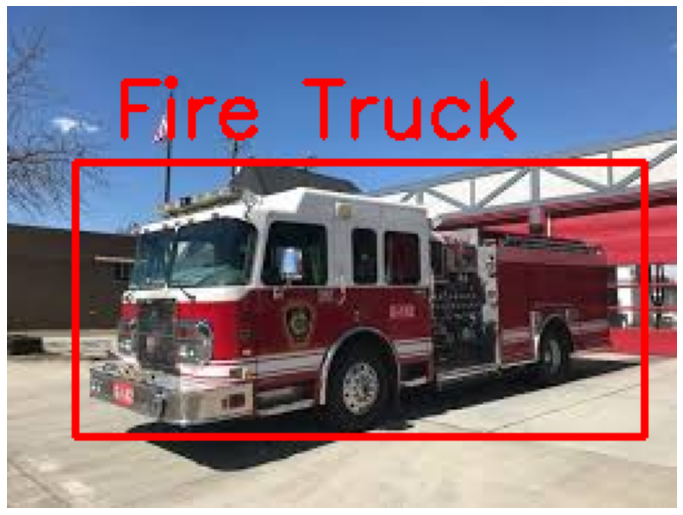

In [ ]:
# Execute prediction on a single image
img = cv2.imread("/content/gdrive/My Drive/darknet/Test_img/1152.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

Fire truck detected.

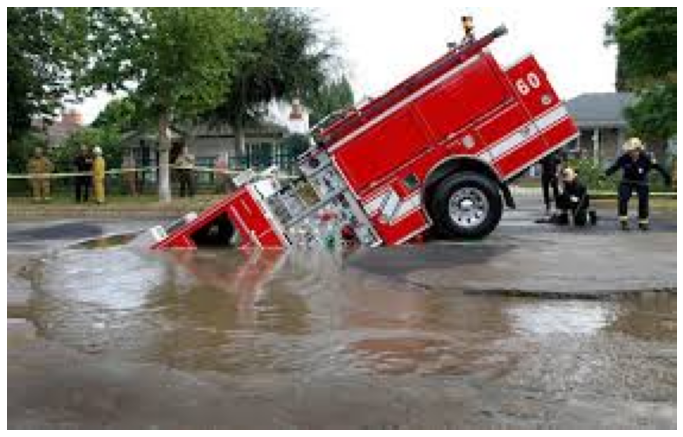

In [ ]:
# Execute prediction on a single image
img = cv2.imread("/content/gdrive/My Drive/darknet/Test_img/1130.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

Failed to detect a fire truck which is tilted and with its head in water. 

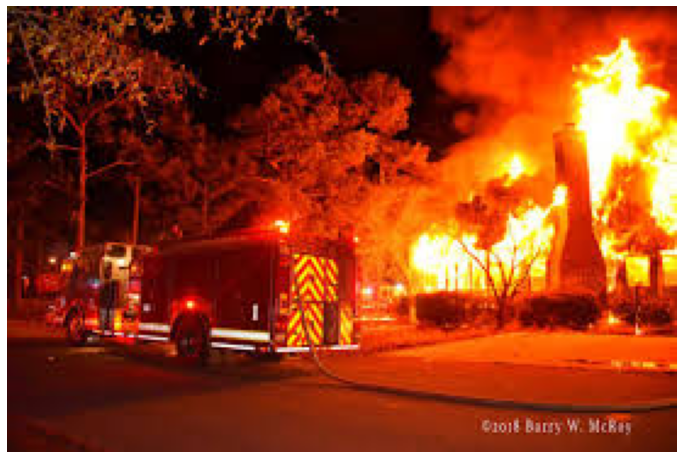

In [ ]:
# Execute prediction on a single image
img = cv2.imread("/content/gdrive/My Drive/darknet/Test_img/1126.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

Failed to detect a fire truck in this lighting condition. We need to add pictures with this type of lighting condition into taining data set and data augmentation.

In [ ]:
# Execute prediction on a single image
img = cv2.imread("/content/gdrive/My Drive/darknet/Test_img/1737.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

It detected train (others). This a challenge task as we put cars, trains and different types of vehicles in this group to test the network's capability.

###Test with a video

In [ ]:
### Apply Yolov3 for object dectection on a video
from google.colab.patches import cv2_imshow

cap =cv2.VideoCapture('/content/gdrive/My Drive/darknet/Test_Vedio/emv_test4.mp4')

number_frame = 30.0 #higher frames better quality of the video
video_size = (1280,720)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('/content/gdrive/My Drive/darknet/Test_Vedio/Emv_detection5.mp4',fourcc, number_frame, video_size)

while True:
    ret,frame = cap.read() 
    
    if ret:
        
        frame = cv2.resize(frame, (1280,720))
        frame = predict(frame)
 #       cv2.imshow("image",frame)
        cv2_imshow(frame)        
        out.write(frame)

        if cv2.waitKey(1) & 0xff == ord("q"):
            break
    else:
        break
        
cap.release()   
out.release()
cv2.destroyAllWindows()

In [ ]:
##
# Show the detected video
##
from IPython.display import HTML
from base64 import b64encode
#mp4 = open('truck/buses_detect.mp4','rb').read()
#data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
mp4 = open('/content/gdrive/My Drive/darknet/Test_Vedio/Emv_detection3.mp4','rb').read()
data_url = "data:video/mp4;base64,," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#### Summary



A YOLO model is trained to detect 8 types of vehicles. It works reasonably well in idea conditions. However, it is not very sucessful in some challenge conditions.

Here are some ideas for further work:
* Train the model with more samples, especially more samples with different challenge conditions. Also, add image with siren lights on, etc.
* Explore splitting the "Others" group - putting 'sedan' and 'train' in the same class might make the machine learning harder.
* Use augmentation to further increase sample size and variety.
* Reduce data size (resolution) for higher speed
* Out of box: for an real application, integrate with sound to detect emergent vehicles